# CONDITIONAL VARIANCE STATISTIC

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

In [13]:
PD_eyesOpen = np.load('PD_eyesOpen.npy', allow_pickle=True)
PD_eyesClosed = np.load('PD_eyesClosed.npy', allow_pickle=True)

HC_eyesOpen = np.load('HC_eyesOpen.npy', allow_pickle=True)
HC_eyesClosed = np.load('HC_eyesClosed.npy', allow_pickle=True)

In [14]:
fs = 80000/120  # Częstotliwość próbkowania sygnału - okolo 80000 obserwacji - 2 minuty

# PACJENCI CHORZY - OCZY OTWARTE

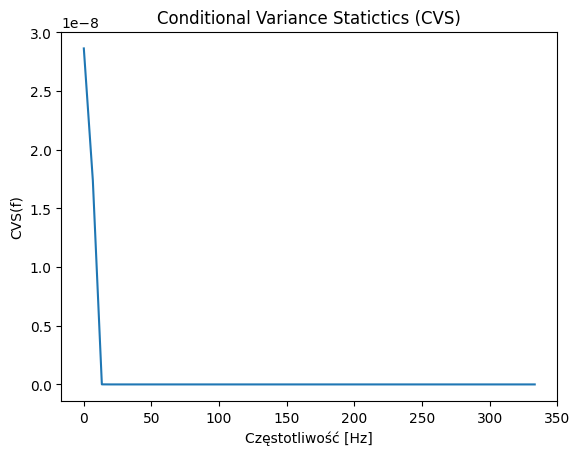

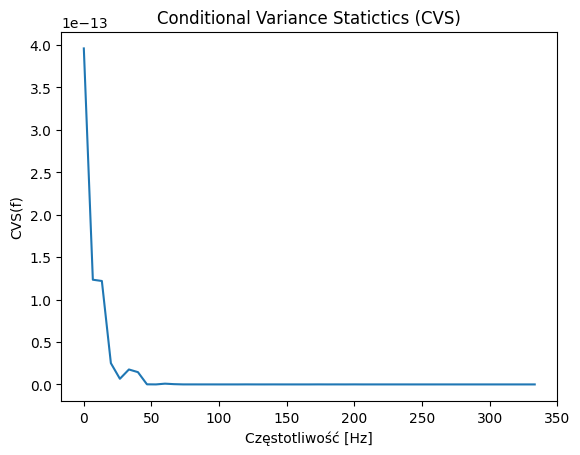

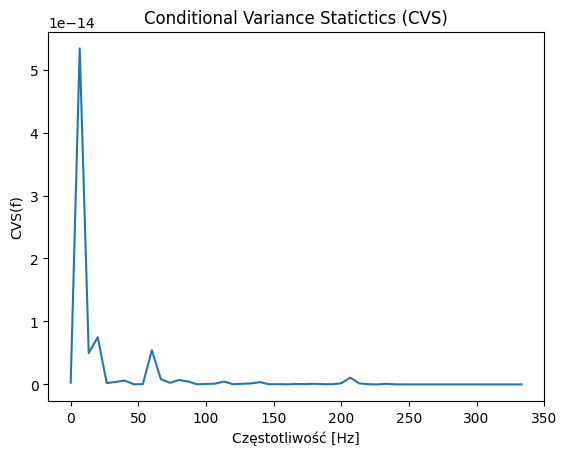

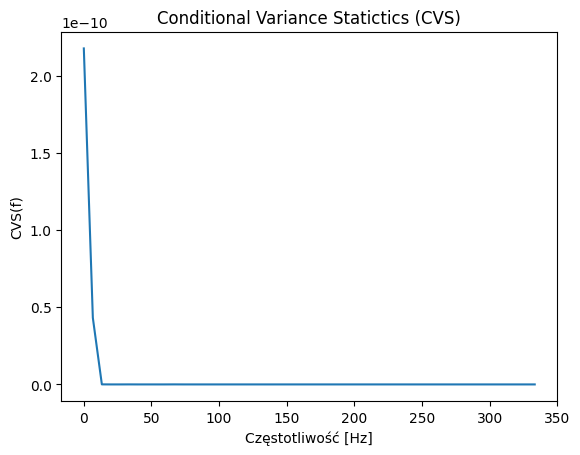

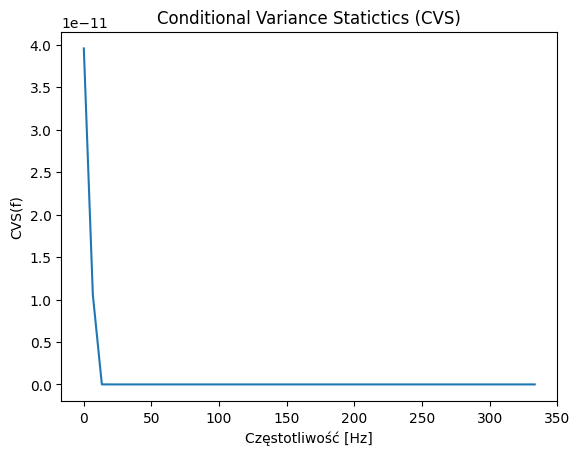

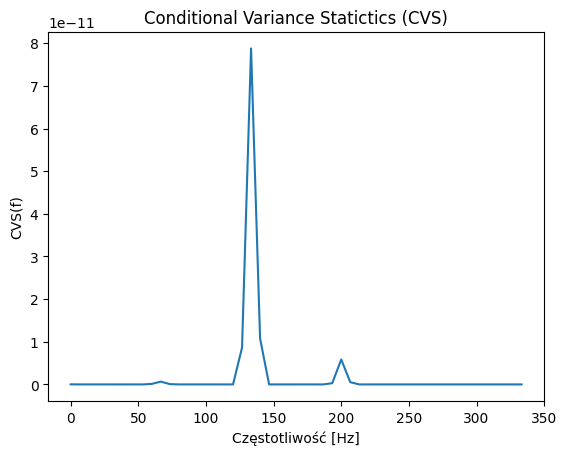

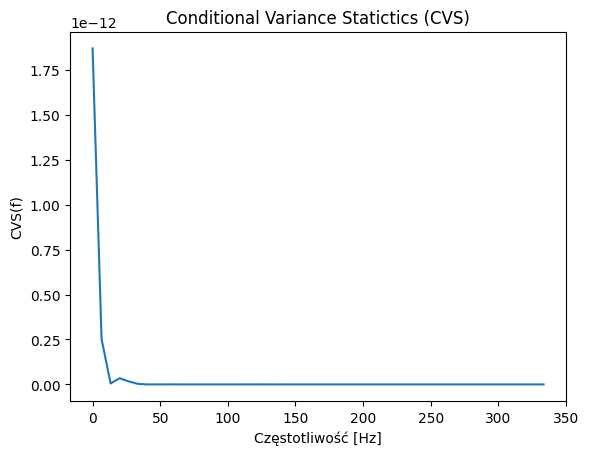

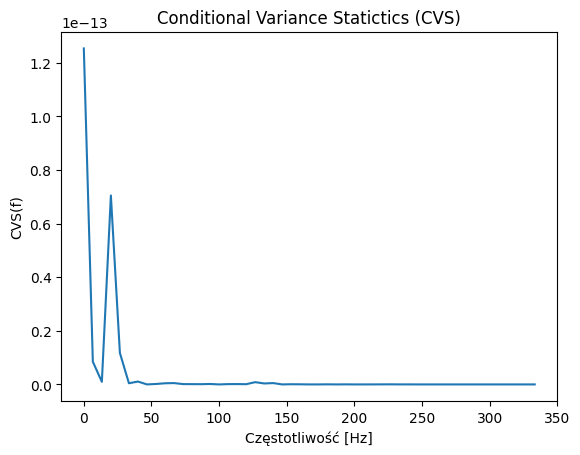

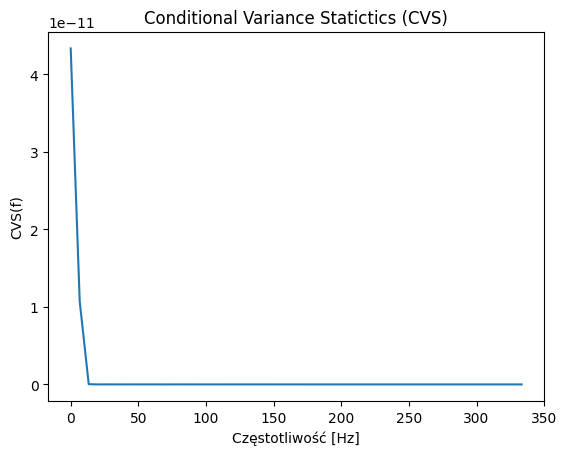

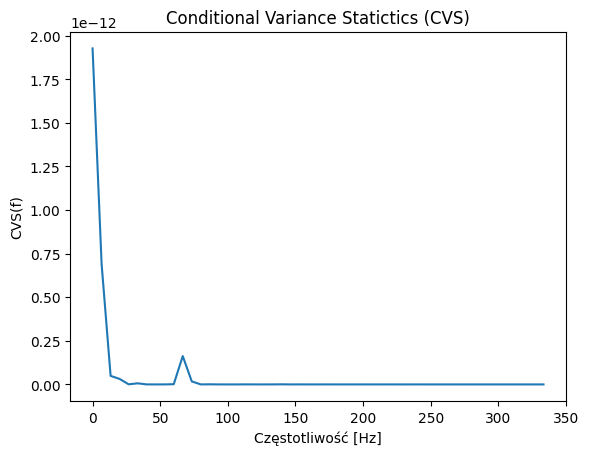

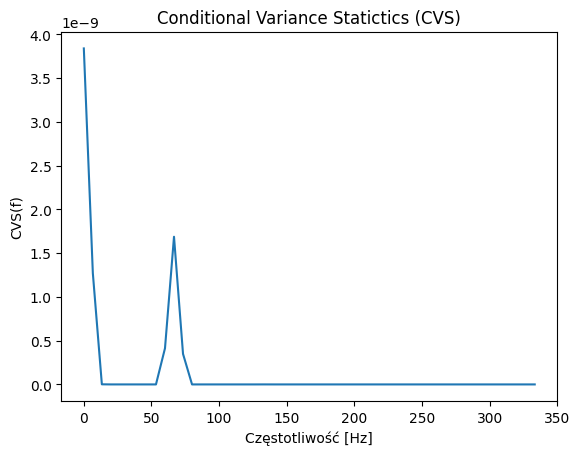

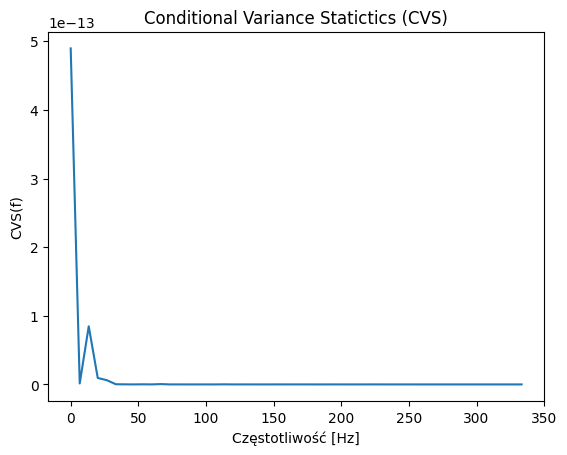

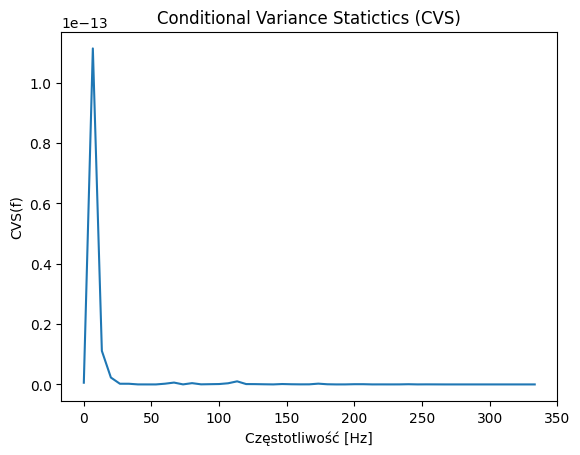

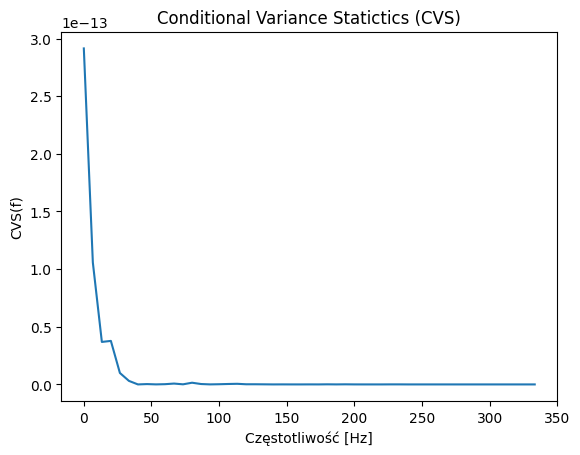

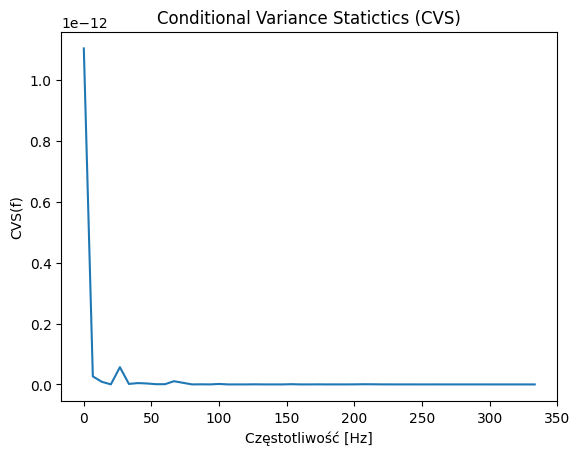

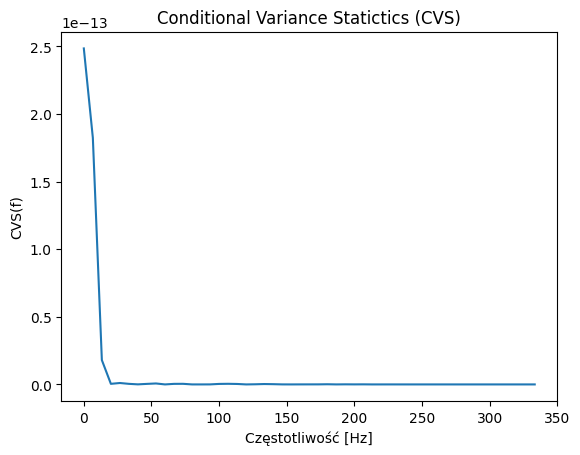

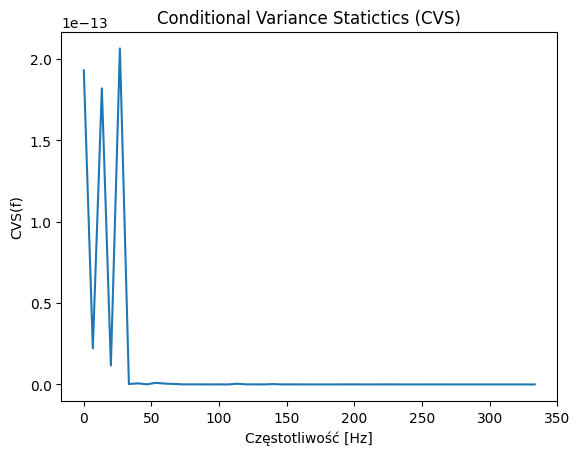

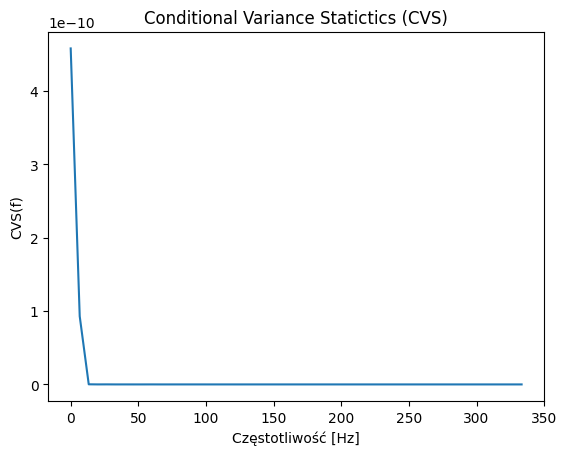

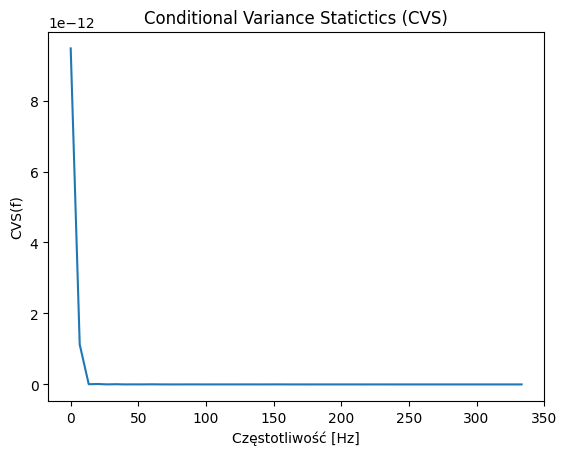

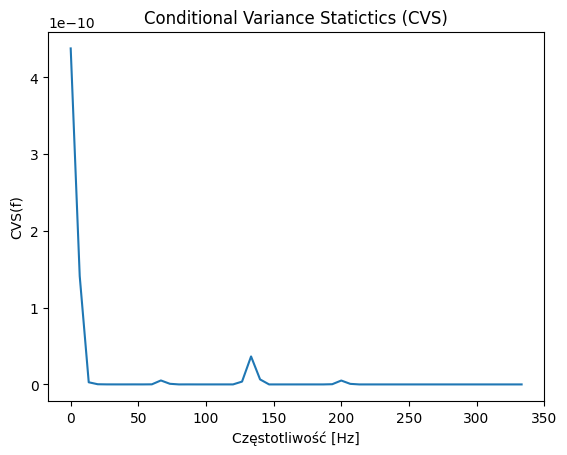

In [51]:
for i in range(len(PD_eyesOpen)):
    eeg_signal = PD_eyesOpen[i]
    nperseg = 100  # Długość segmentu okna
    noverlap = 50  # Liczba próbek nałożenia segmentów

    f, t, Zxx = signal.stft(eeg_signal, fs=fs, nperseg=nperseg, noverlap=noverlap)
    CVS = np.zeros(len(f))
    T = len(t)
    
    for j in range(len(f)):
        s = np.abs(Zxx[j, :])
        N = len(s)
        sigma2 = np.var(s)
        # Wyznaczenie kwantyli dla przedziałów
        x_quantiles = np.quantile(s, [0.004, 0.062, 0.308, 0.692, 0.938, 0.996])
        
        # Przedziały
        A_1 = s[s <= x_quantiles[0]]
        A_2 = s[(s > x_quantiles[0]) & (s <= x_quantiles[1])]
        A_3 = s[(s > x_quantiles[1]) & (s <= x_quantiles[2])]
        A_4 = s[(s > x_quantiles[2]) & (s <= x_quantiles[3])]
        A_5 = s[(s > x_quantiles[3]) & (s <= x_quantiles[4])]
        A_6 = s[(s > x_quantiles[4]) & (s <= x_quantiles[5])]
        A_7 = s[s > x_quantiles[5]]
        sigmas = np.array([np.var(A_1),np.var(A_2),np.var(A_3),np.var(A_4),np.var(A_5),np.var(A_6),np.var(A_7)])
        sigmas = np.nan_to_num(sigmas, nan=0)
        CVS[j] = np.sqrt(N)*((sigmas[2]-sigmas[3]) + (sigmas[4]-sigmas[3]))**2/sigma2
    
    plt.plot(f,CVS)
    plt.figsize=(8,2)
    plt.title('Conditional Variance Statictics (CVS)')
    plt.ylabel('CVS(f)')
    plt.xlabel('Częstotliwość [Hz]')
    # plt.savefig(f"Statystyka_JB_otwarte_oczy_pacjent_chory_{i}.png")
    plt.show()

# PACJENCI ZDROWI - OCZY OTWARTE

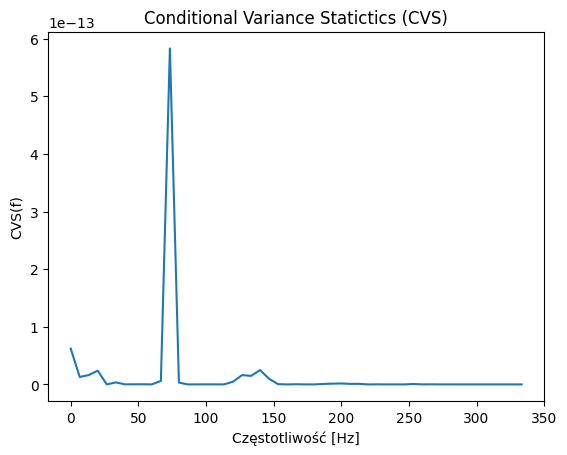

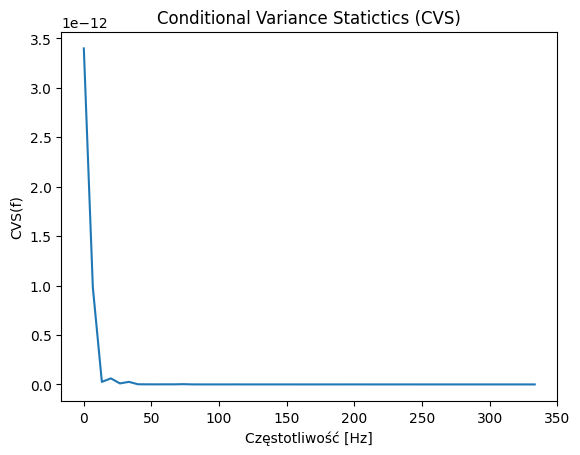

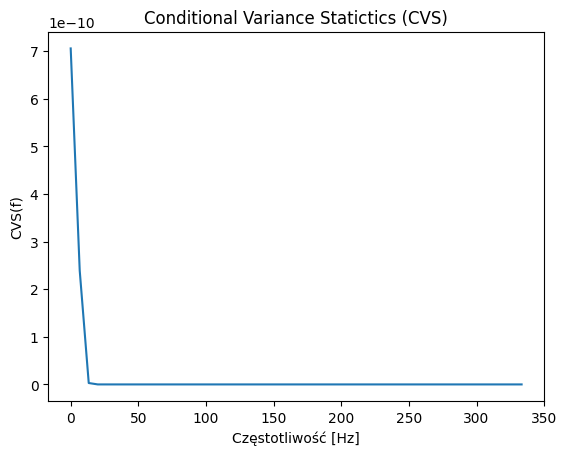

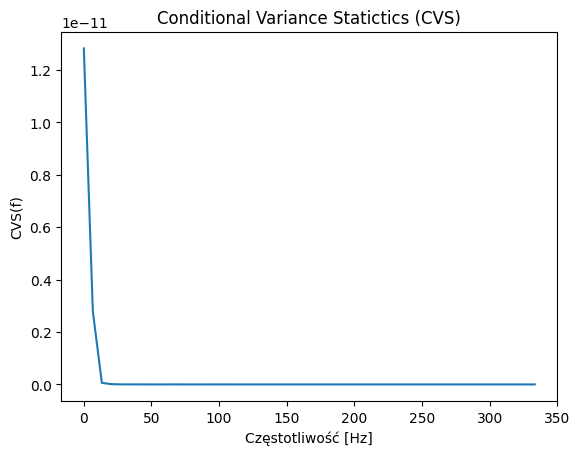

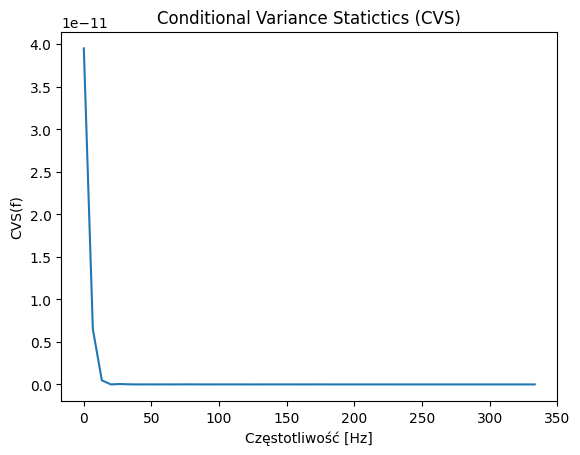

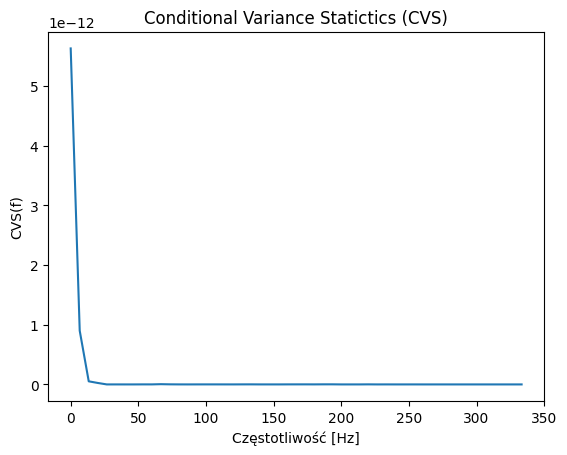

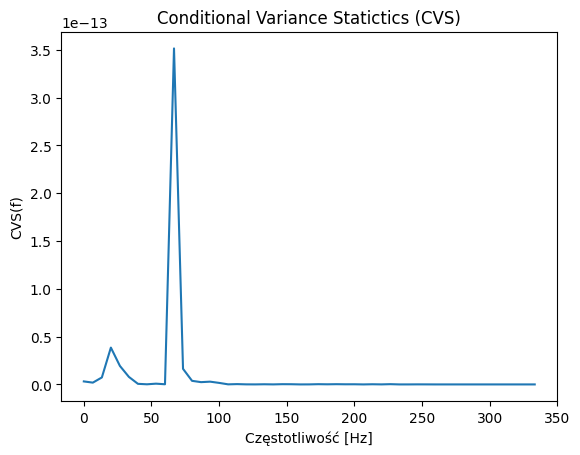

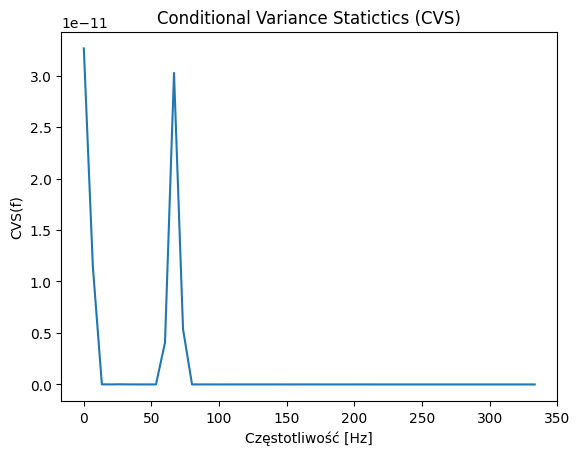

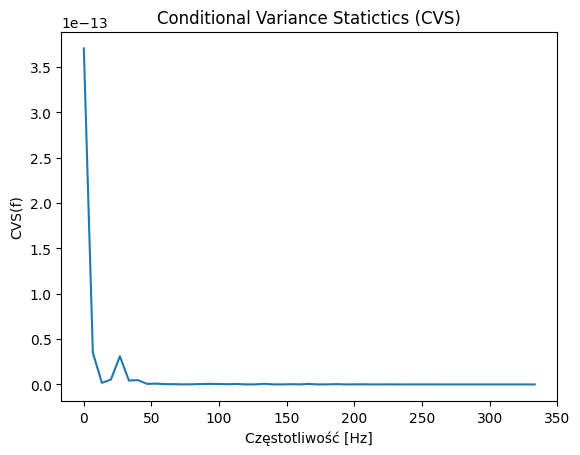

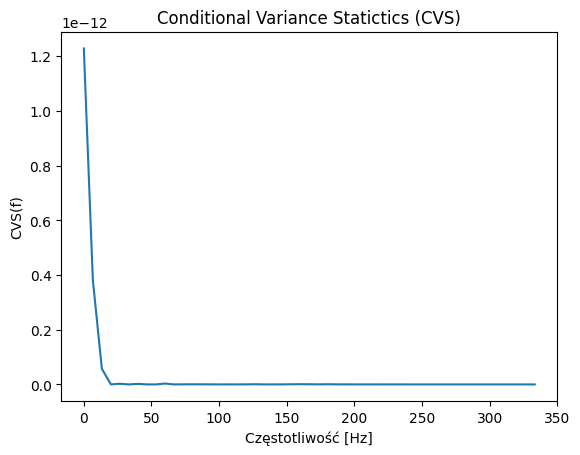

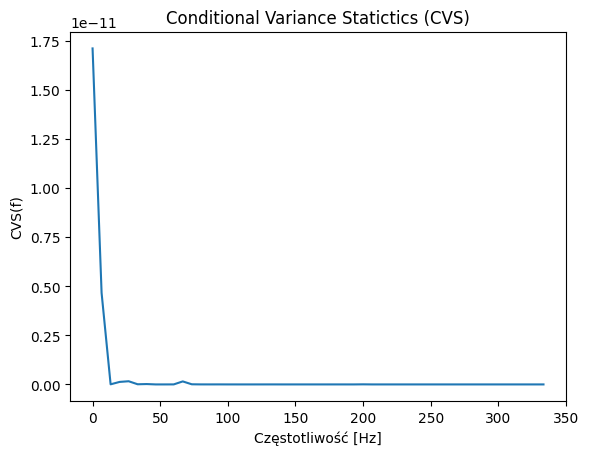

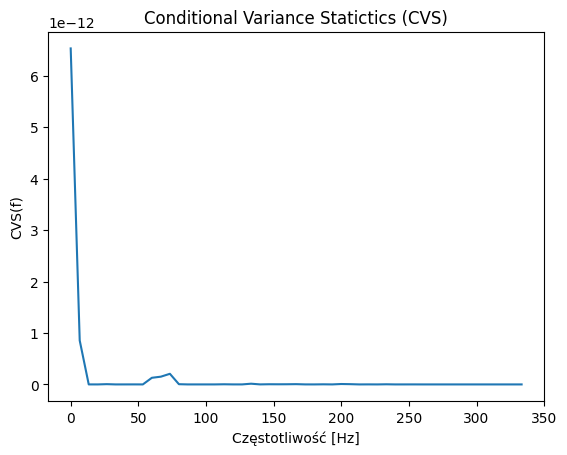

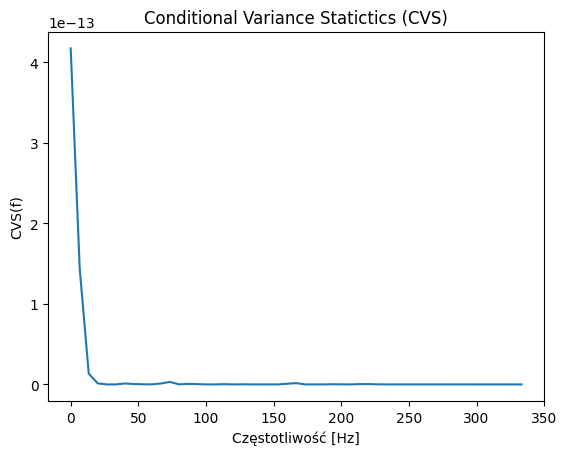

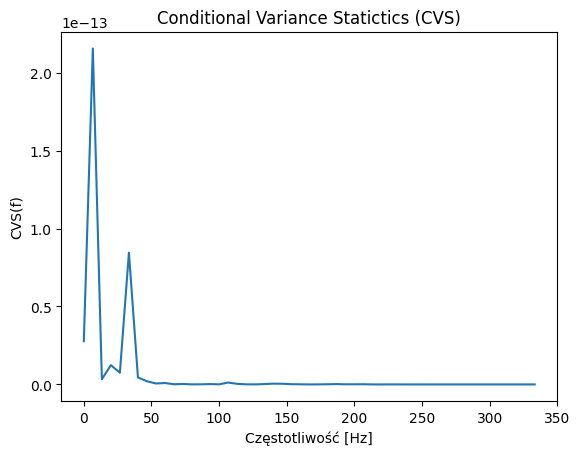

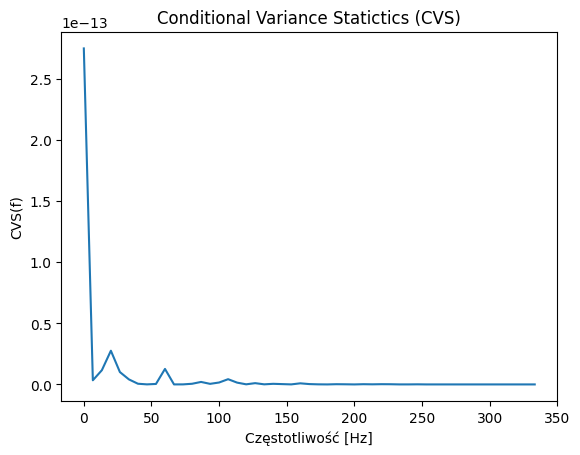

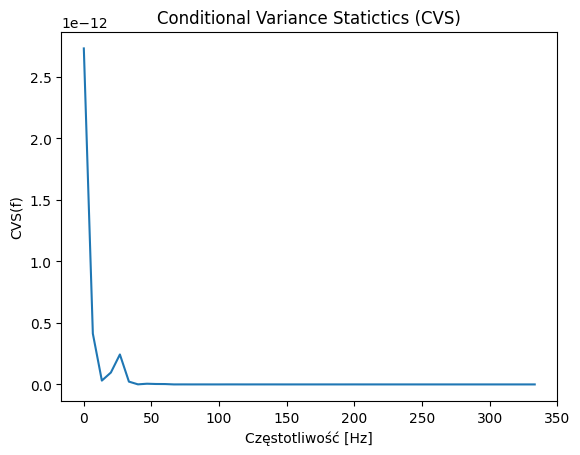

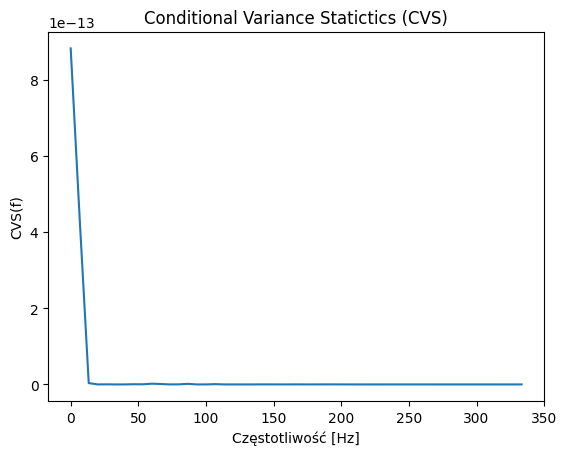

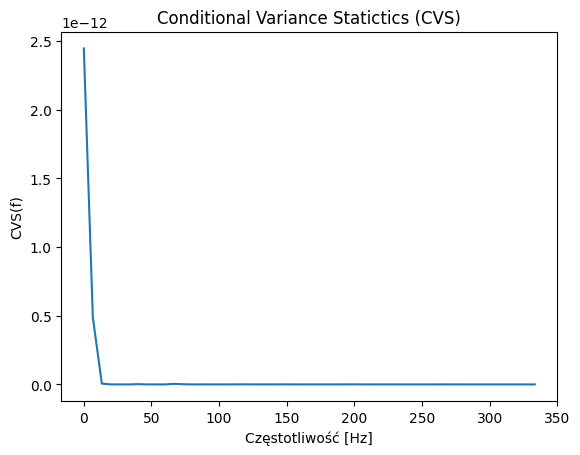

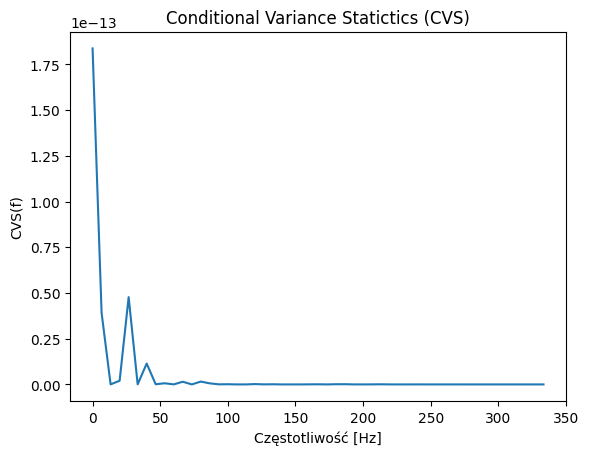

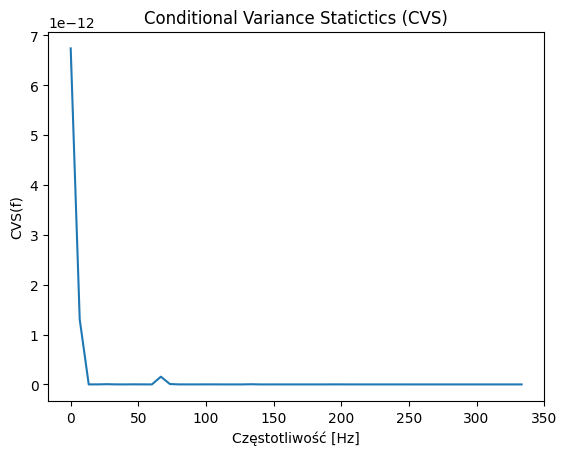

In [52]:
for i in range(len(HC_eyesOpen)):
    eeg_signal = HC_eyesOpen[i]
    nperseg = 100  # Długość segmentu okna
    noverlap = 50  # Liczba próbek nałożenia segmentów

    f, t, Zxx = signal.stft(eeg_signal, fs=fs, nperseg=nperseg, noverlap=noverlap)
    CVS = np.zeros(len(f))
    T = len(t)
    
    for j in range(len(f)):
        s = np.abs(Zxx[j, :])
        N = len(s)
        sigma2 = np.var(s)
        # Wyznaczenie kwantyli dla przedziałów
        x_quantiles = np.quantile(s, [0.004, 0.062, 0.308, 0.692, 0.938, 0.996])
        
        # Przedziały
        A_1 = s[s <= x_quantiles[0]]
        A_2 = s[(s > x_quantiles[0]) & (s <= x_quantiles[1])]
        A_3 = s[(s > x_quantiles[1]) & (s <= x_quantiles[2])]
        A_4 = s[(s > x_quantiles[2]) & (s <= x_quantiles[3])]
        A_5 = s[(s > x_quantiles[3]) & (s <= x_quantiles[4])]
        A_6 = s[(s > x_quantiles[4]) & (s <= x_quantiles[5])]
        A_7 = s[s > x_quantiles[5]]
        sigmas = np.array([np.var(A_1),np.var(A_2),np.var(A_3),np.var(A_4),np.var(A_5),np.var(A_6),np.var(A_7)])
        sigmas = np.nan_to_num(sigmas, nan=0)
        CVS[j] = np.sqrt(N)*((sigmas[2]-sigmas[3]) + (sigmas[4]-sigmas[3]))**2/sigma2
        
    plt.plot(f,CVS)
    plt.figsize=(8,2)
    plt.title('Conditional Variance Statictics (CVS)')
    plt.ylabel('CVS(f)')
    plt.xlabel('Częstotliwość [Hz]')
    # plt.savefig(f"Statystyka_JB_otwarte_oczy_pacjent_chory_{i}.png")
    plt.show()

# PACJENCI CHORZY - OCZY ZAMKNIĘTE

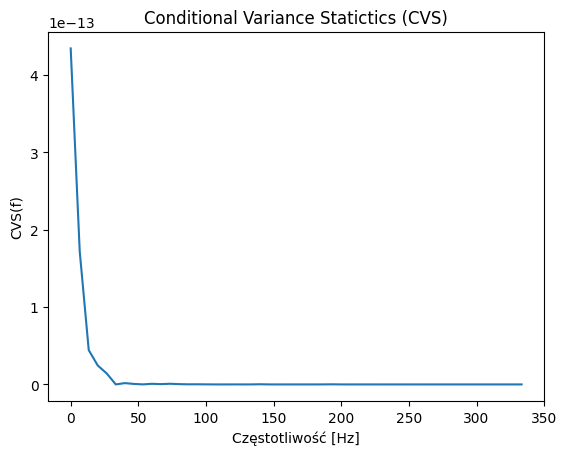

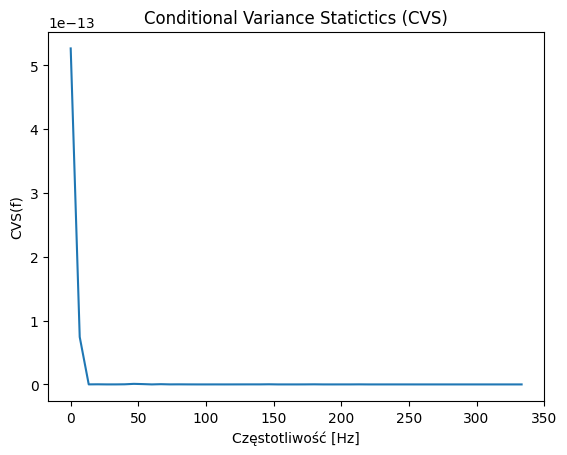

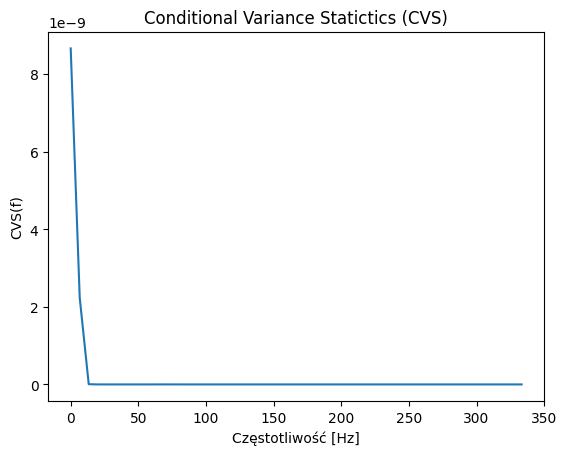

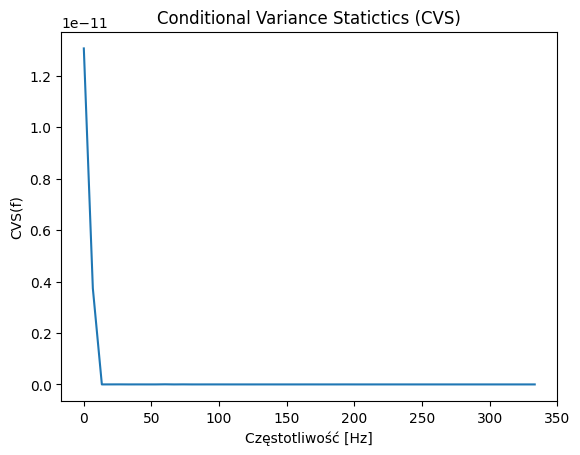

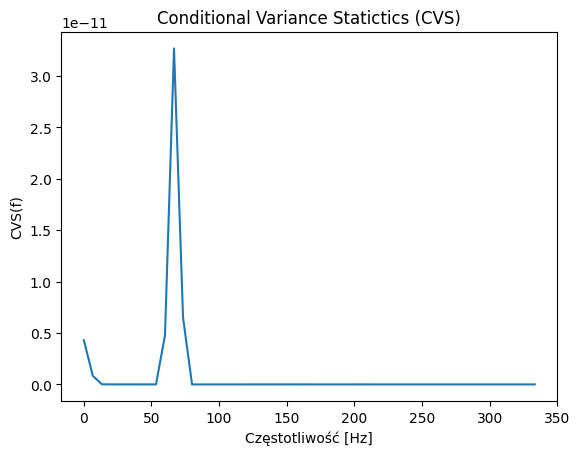

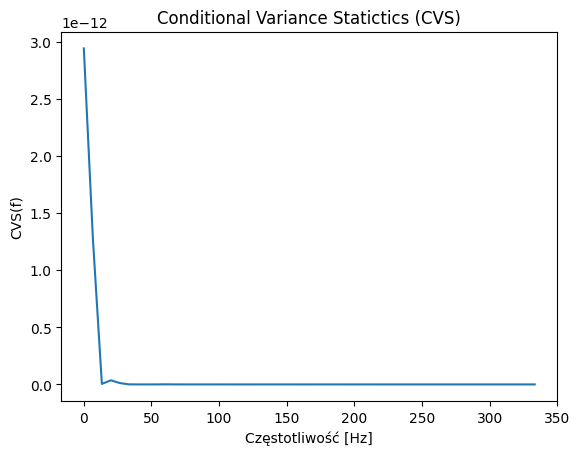

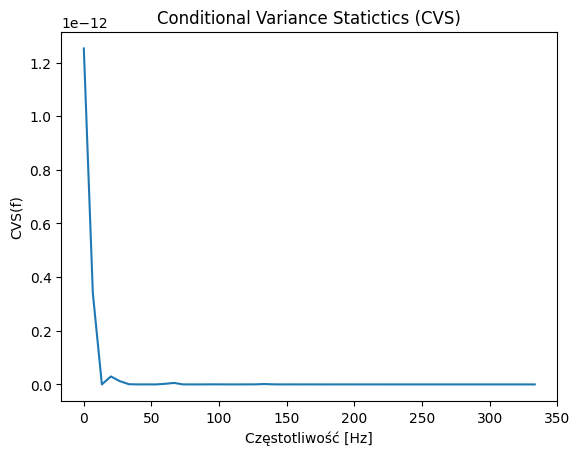

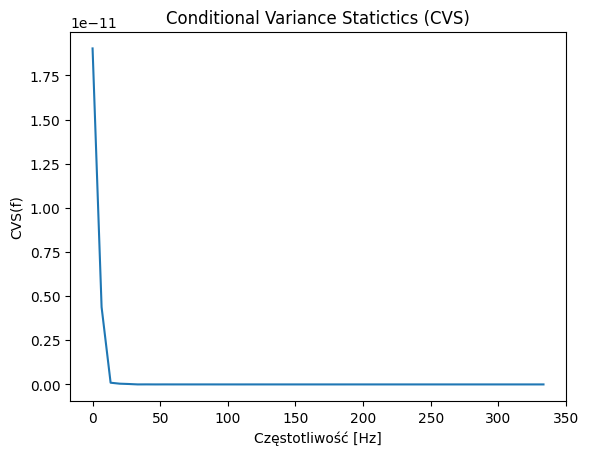

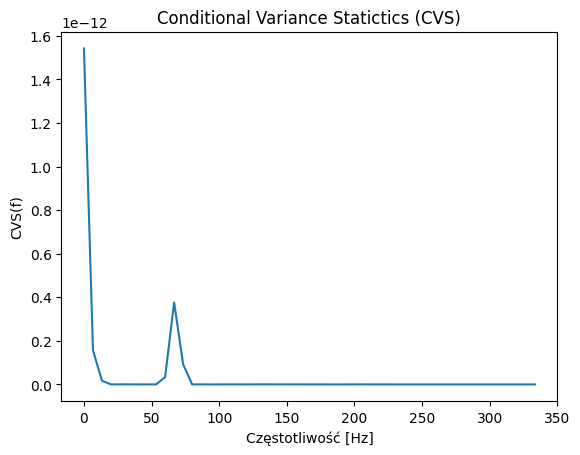

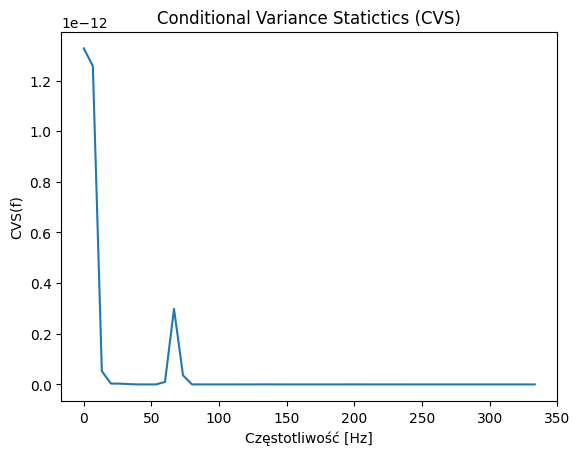

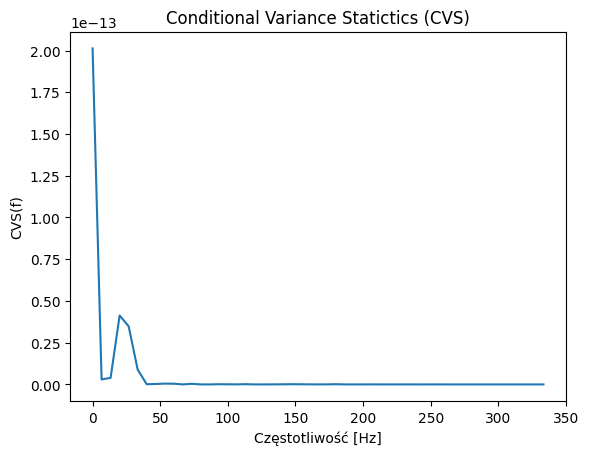

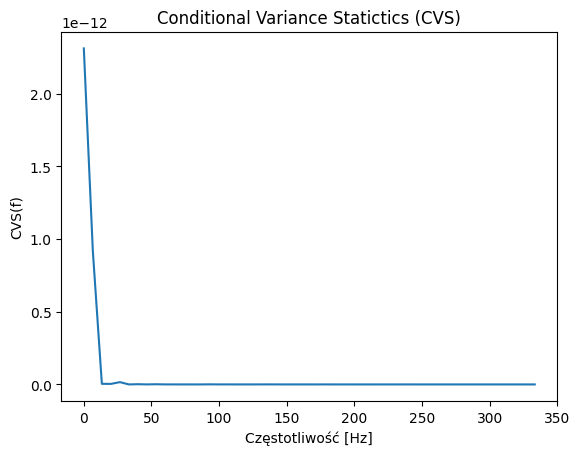

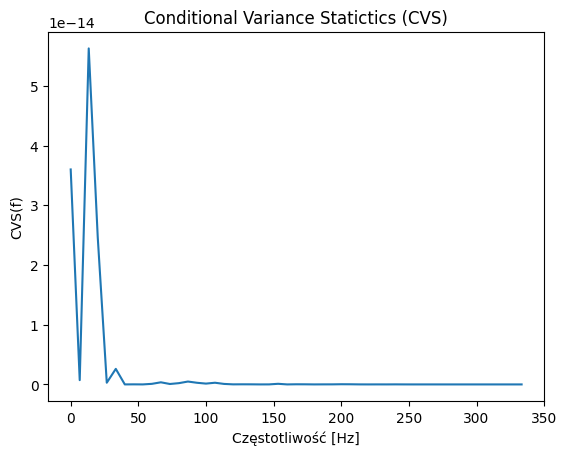

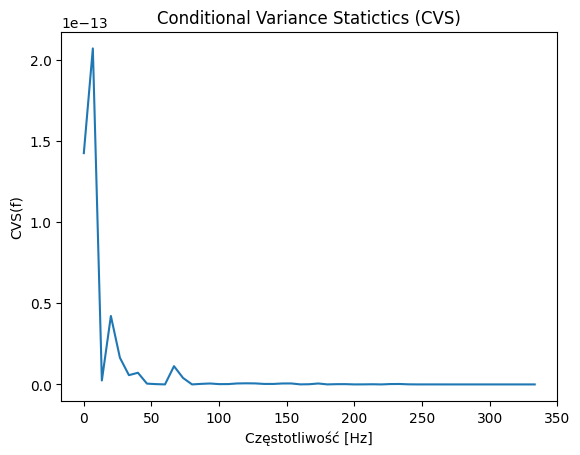

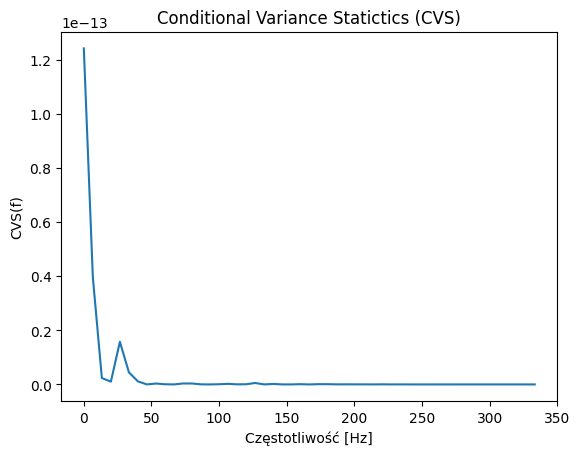

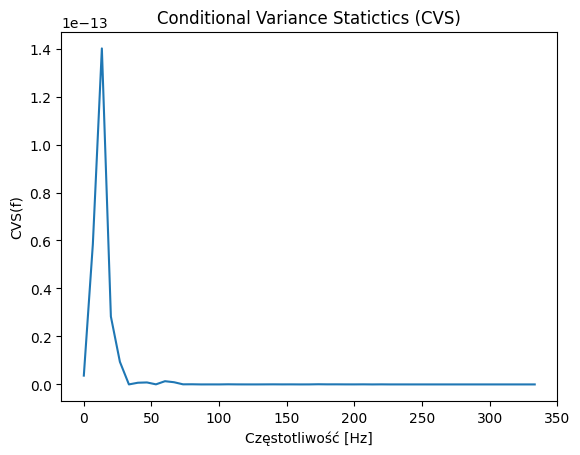

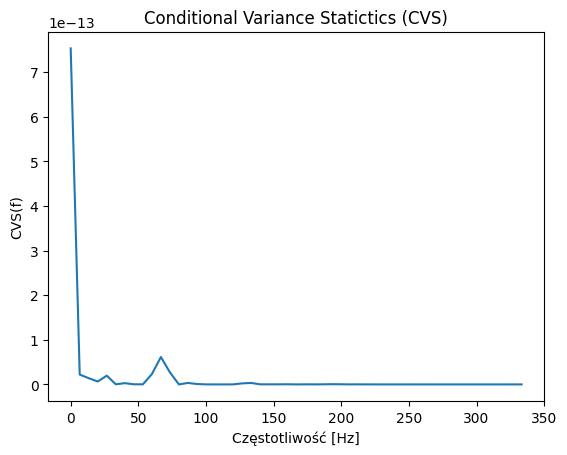

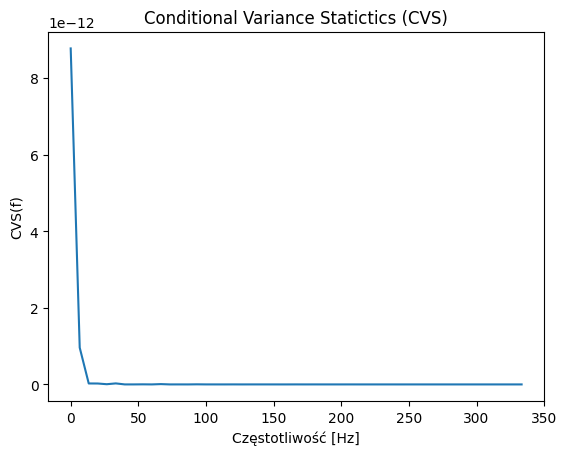

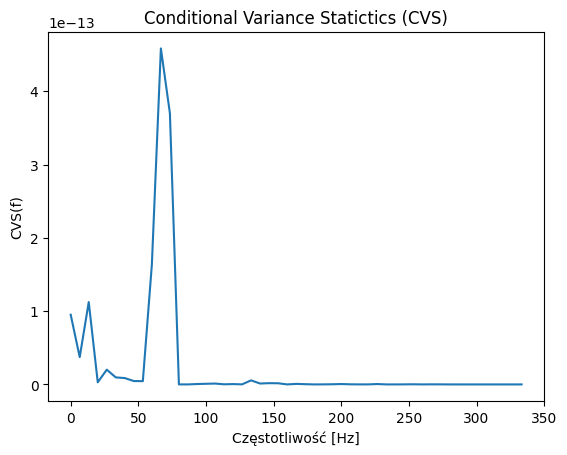

In [53]:
for i in range(len(PD_eyesClosed)):
    eeg_signal = PD_eyesClosed[i]
    nperseg = 100  # Długość segmentu okna
    noverlap = 50  # Liczba próbek nałożenia segmentów

    f, t, Zxx = signal.stft(eeg_signal, fs=fs, nperseg=nperseg, noverlap=noverlap)
    CVS = np.zeros(len(f))
    T = len(t)
    
    for j in range(len(f)):
        s = np.abs(Zxx[j, :])
        N = len(s)
        sigma2 = np.var(s)
        # Wyznaczenie kwantyli dla przedziałów
        x_quantiles = np.quantile(s, [0.004, 0.062, 0.308, 0.692, 0.938, 0.996])
        
        # Przedziały
        A_1 = s[s <= x_quantiles[0]]
        A_2 = s[(s > x_quantiles[0]) & (s <= x_quantiles[1])]
        A_3 = s[(s > x_quantiles[1]) & (s <= x_quantiles[2])]
        A_4 = s[(s > x_quantiles[2]) & (s <= x_quantiles[3])]
        A_5 = s[(s > x_quantiles[3]) & (s <= x_quantiles[4])]
        A_6 = s[(s > x_quantiles[4]) & (s <= x_quantiles[5])]
        A_7 = s[s > x_quantiles[5]]
        sigmas = np.array([np.var(A_1),np.var(A_2),np.var(A_3),np.var(A_4),np.var(A_5),np.var(A_6),np.var(A_7)])
        sigmas = np.nan_to_num(sigmas, nan=0)
        CVS[j] = np.sqrt(N)*((sigmas[2]-sigmas[3]) + (sigmas[4]-sigmas[3]))**2/sigma2
    
    plt.plot(f,CVS)
    plt.figsize=(8,2)
    plt.title('Conditional Variance Statictics (CVS)')
    plt.ylabel('CVS(f)')
    plt.xlabel('Częstotliwość [Hz]')
    # plt.savefig(f"Statystyka_JB_otwarte_oczy_pacjent_chory_{i}.png")
    plt.show()

# PACJENCI ZDROWI - OCZY ZAMKNIĘTE

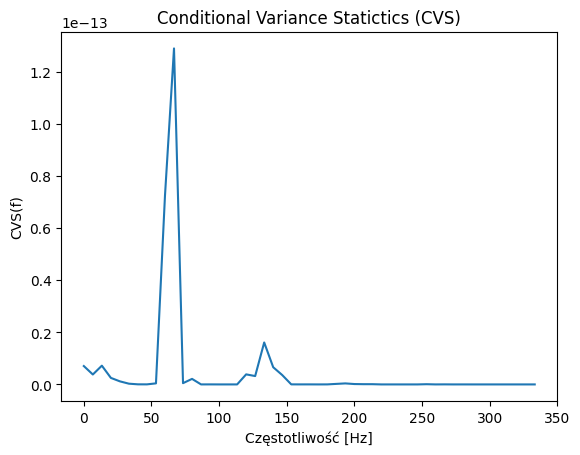

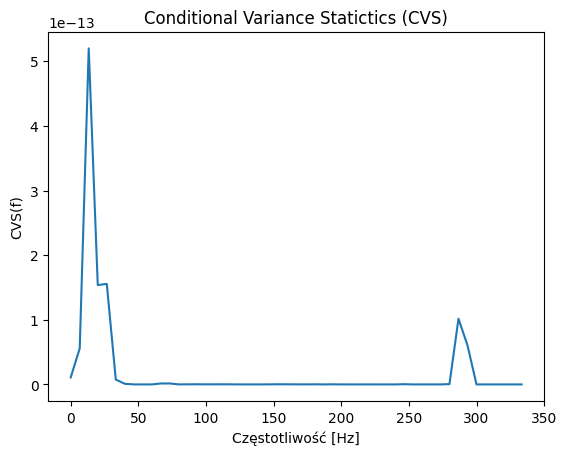

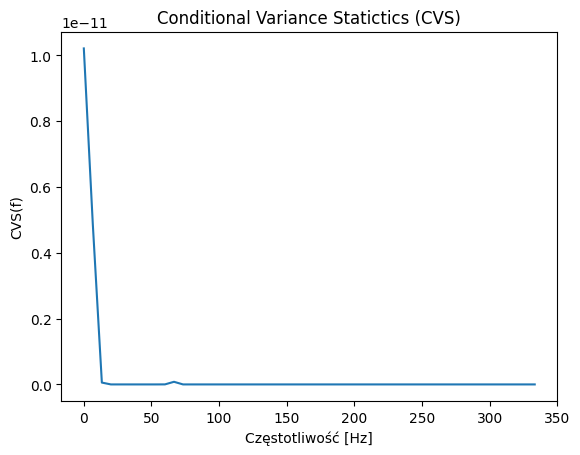

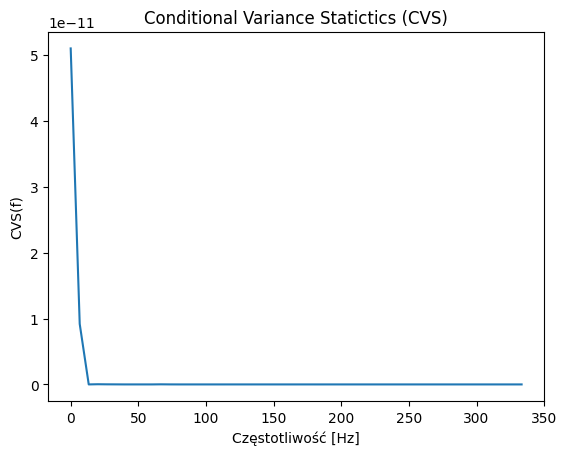

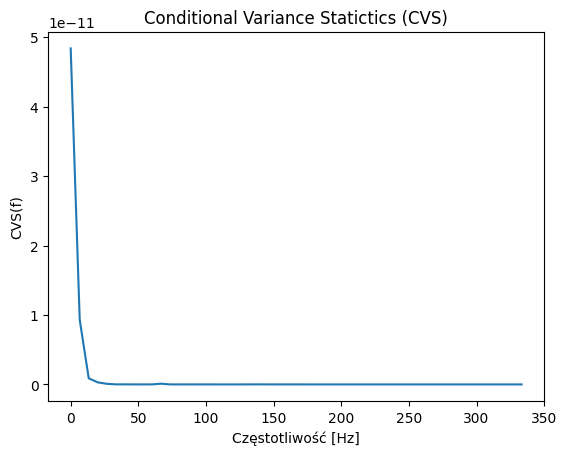

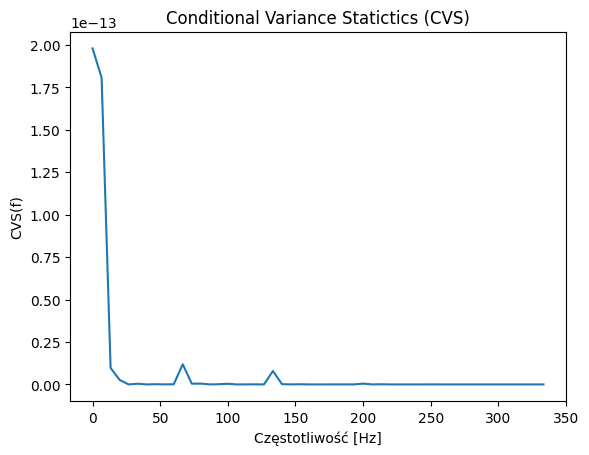

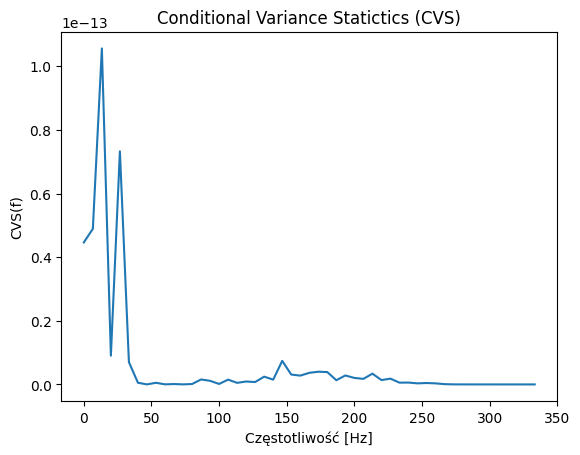

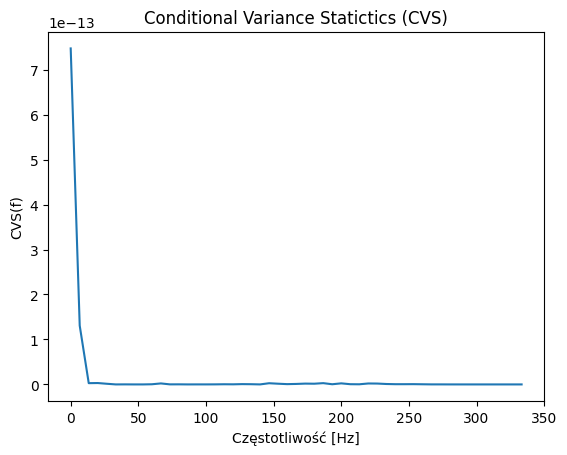

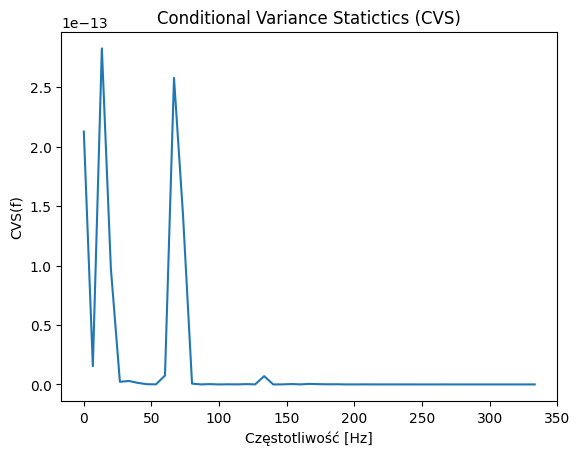

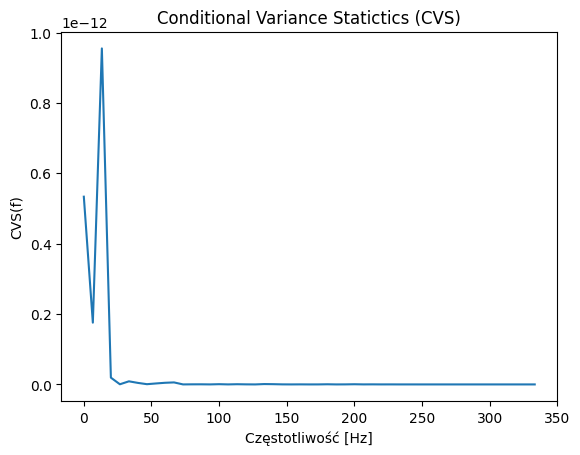

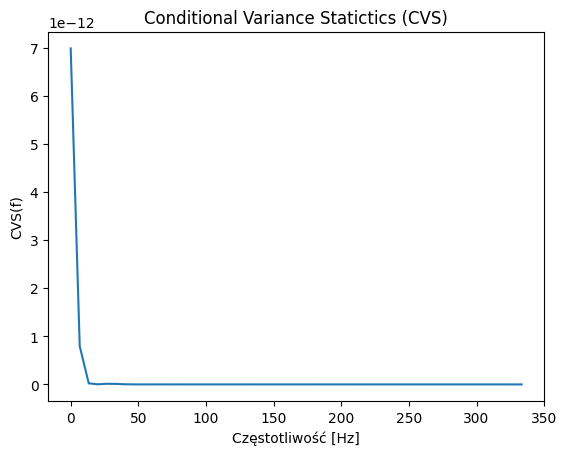

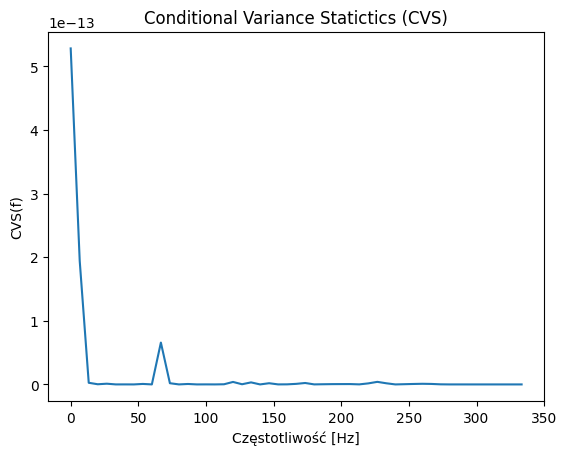

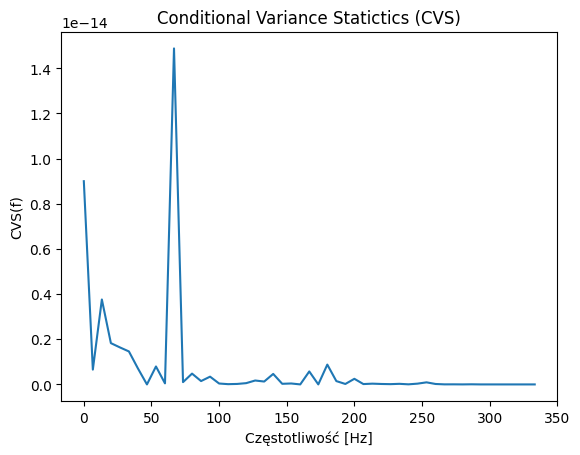

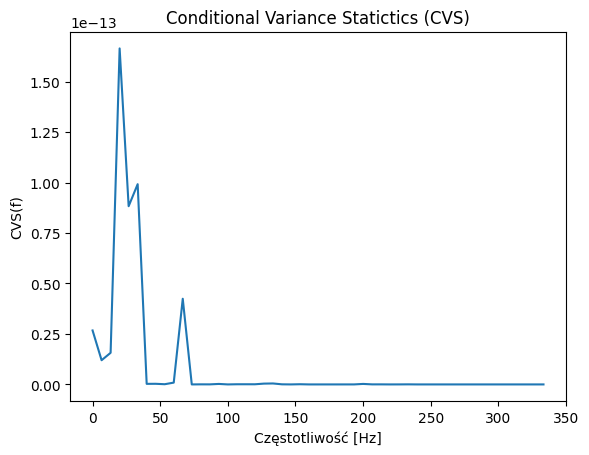

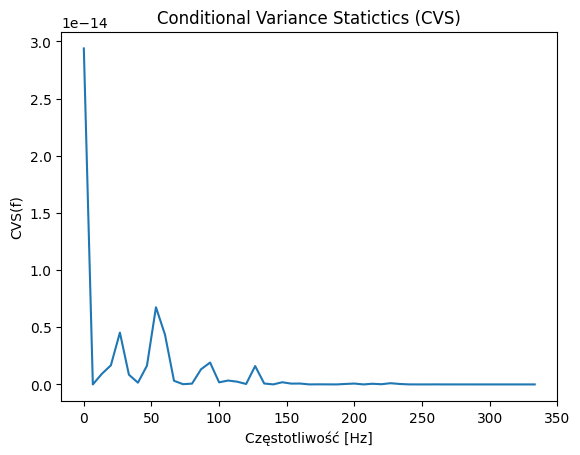

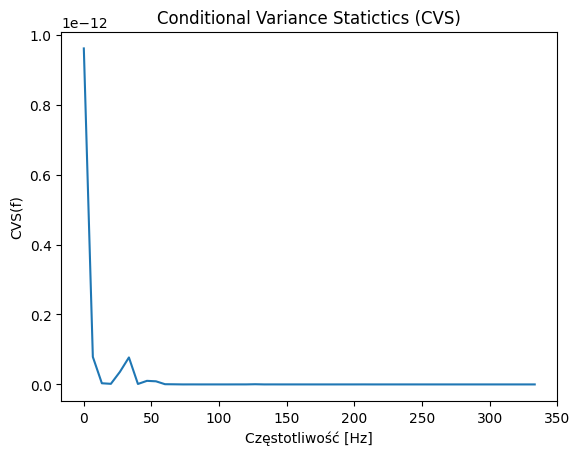

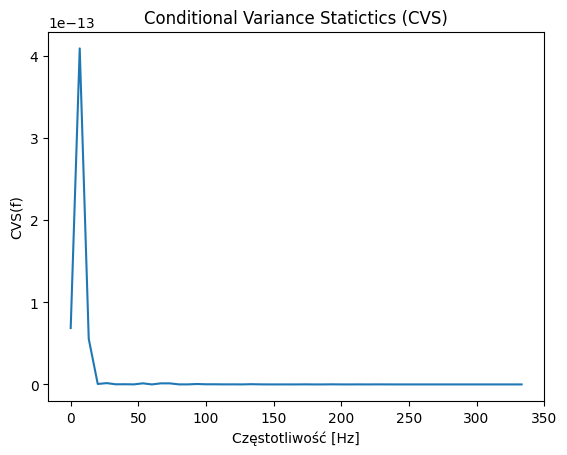

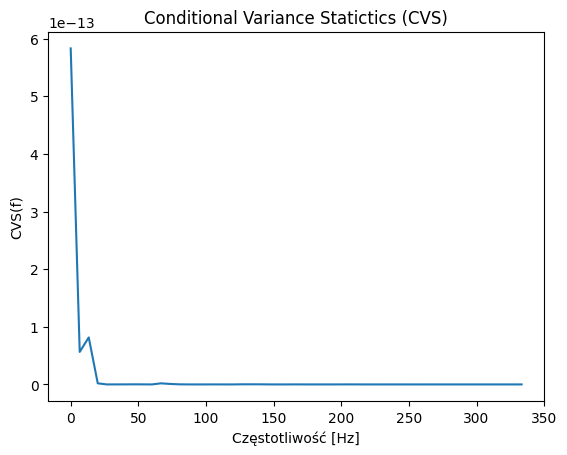

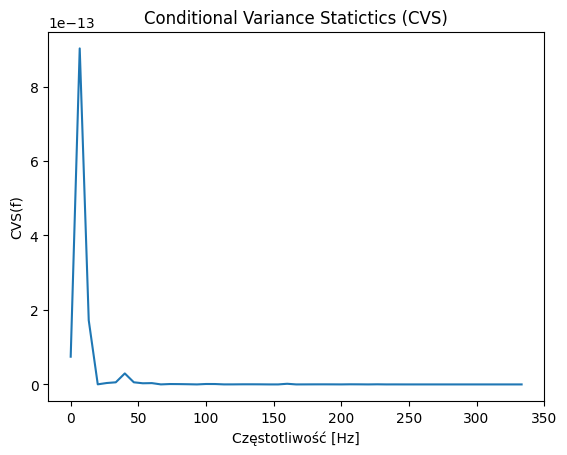

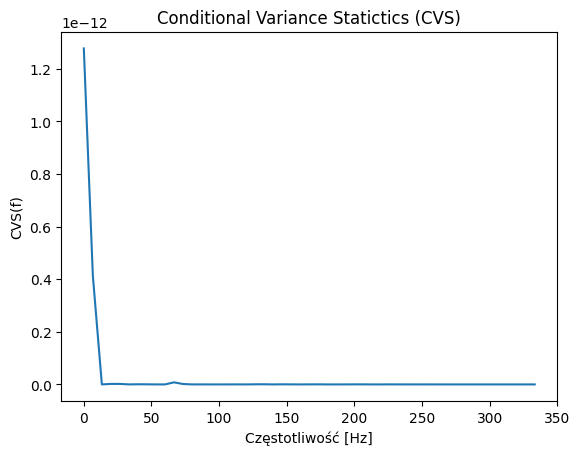

In [54]:
for i in range(len(HC_eyesClosed)):
    eeg_signal = HC_eyesClosed[i]
    nperseg = 100  # Długość segmentu okna
    noverlap = 50  # Liczba próbek nałożenia segmentów

    f, t, Zxx = signal.stft(eeg_signal, fs=fs, nperseg=nperseg, noverlap=noverlap)
    CVS = np.zeros(len(f))
    T = len(t)
    
    for j in range(len(f)):
        s = np.abs(Zxx[j, :])
        N = len(s)
        sigma2 = np.var(s)
        # Wyznaczenie kwantyli dla przedziałów
        x_quantiles = np.quantile(s, [0.004, 0.062, 0.308, 0.692, 0.938, 0.996])
        
        # Przedziały
        A_1 = s[s <= x_quantiles[0]]
        A_2 = s[(s > x_quantiles[0]) & (s <= x_quantiles[1])]
        A_3 = s[(s > x_quantiles[1]) & (s <= x_quantiles[2])]
        A_4 = s[(s > x_quantiles[2]) & (s <= x_quantiles[3])]
        A_5 = s[(s > x_quantiles[3]) & (s <= x_quantiles[4])]
        A_6 = s[(s > x_quantiles[4]) & (s <= x_quantiles[5])]
        A_7 = s[s > x_quantiles[5]]
        sigmas = np.array([np.var(A_1),np.var(A_2),np.var(A_3),np.var(A_4),np.var(A_5),np.var(A_6),np.var(A_7)])
        sigmas = np.nan_to_num(sigmas, nan=0)
        CVS[j] = np.sqrt(N)*((sigmas[2]-sigmas[3]) + (sigmas[4]-sigmas[3]))**2/sigma2
    
    plt.plot(f,CVS)
    plt.figsize=(8,2)
    plt.title('Conditional Variance Statictics (CVS)')
    plt.ylabel('CVS(f)')
    plt.xlabel('Częstotliwość [Hz]')
    # plt.savefig(f"Statystyka_JB_otwarte_oczy_pacjent_chory_{i}.png")
    plt.show()